In [ ]:
#codigo para instalar las librerias que utilizaremos.

!pip install siuba
!pip install pandas
!pip instal plotnine
!pip install numpy
!pip install matplotlib
!pip install pandas_datareader
!pip install datetime
!pip install yfinance
!pip install prophet


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.6/208.6 kB 4.3 MB/s eta 0:00:00
ERROR: unknown command "instal" - maybe you meant "install"
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.2/52.2 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.1/247.1 kB 8.4 MB/s eta 0:00:00


In [ ]:
#Realizamos las importaciones correspondiente para el buen funcionamiento de nuestro programa.

import pandas as pd
from siuba import *
from plotnine import *
from prophet import Prophet
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as web
import datetime as dt
import yfinance as yf
from siuba.dply.vector import *


In [ ]:
#Ponemos las fechas para las cuales queremos los datos:
start_date = dt.datetime(1900, 1, 1) #<---Aquí podemos cambiar el año,mes y día
                                          #a partir del cual queremos los datos.

end_date = dt.datetime.now()#<---Podemos ajustar la fecha hasta la cual queremos
                                  #los datos poniendo .datetime(AÑO, MES,DÍA),
                                  #en este caso estamos seleccionando datos
                                  #hasta el día de hoy con .now()

#Aquí escribimos el ticker de la empresa que deseamos, en nuestro caso serán los
#tickers: "MELI","AMZN","MSFT","SPOT","ZM","NFLX"
Ticker = "ZM"

# Descargamos los  datos desde Yahoo Finance y llamamos a nuestro Dataframe "df"
df = yf.download(Ticker, start=start_date, end=end_date)
df=df.reset_index() #<---Cambiamos el indice a numeros


[*********************100%%**********************]  1 of 1 completed


In [ ]:
#Mostramos nuestros Dataframe solo con las primeras 5 observaciones
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-04-18,65.000000,66.000000,60.320999,62.000000,62.000000,25764700
1,2019-04-22,61.000000,68.900002,59.939999,65.699997,65.699997,9949700
2,2019-04-23,66.870003,74.168999,65.550003,69.000000,69.000000,6786500
3,2019-04-24,71.400002,71.500000,63.160000,63.200001,63.200001,4973500
4,2019-04-25,64.739998,66.849998,62.599998,65.000000,65.000000,3863300


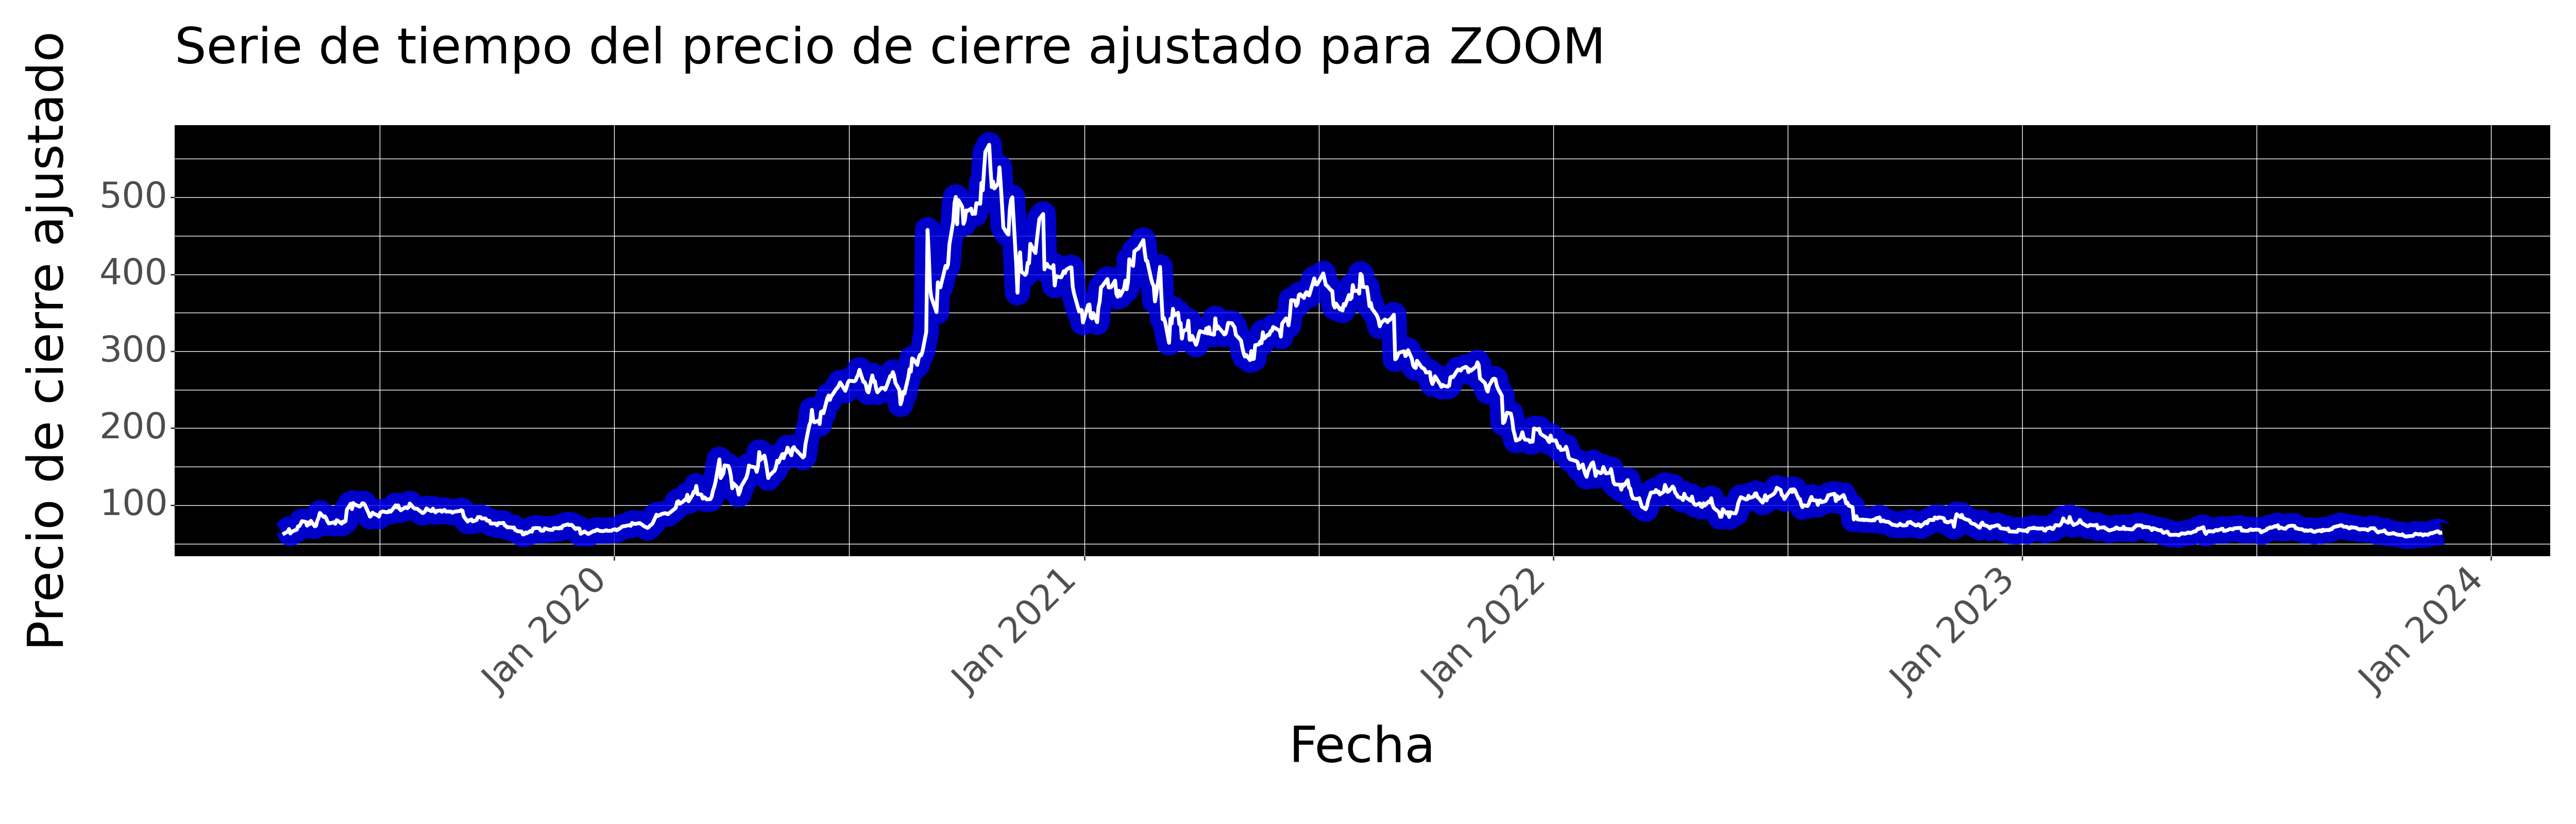

<Figure Size: (2500 x 800)>

In [ ]:
#Graficamos los datos con el uso de ggplot, colocamos en el eje x la fecha,
#y en el eje y el precio de cierre ajustado.

(ggplot(df, aes(x='Date', y='Adj Close', group=1))
    + geom_line(color="blue", size=10,alpha=0.8)
    + geom_line(color="white",size=1.5)
    + labs(title='Serie de tiempo del precio de cierre ajustado para ZOOM',
           x='Fecha',
           y='Precio de cierre ajustado')
    + theme(figure_size=(25, 8),panel_background=element_rect(fill="black"),
        panel_grid=element_line(color="white", size=0.5),
        axis_text_x=element_text(size=25, angle=45, hjust=1),
        axis_text_y=element_text(size=25),
        plot_title=element_text(size=35),
         axis_title_x=element_text(size=35),
     axis_title_y=element_text(size=35))
    + scale_x_date(date_breaks="1 year", date_labels="%b %Y"))

In [ ]:
#Veamos algunas estadisticas de nuestro dataframe,creamos una nuevo dataframe
#llamado "datos" usaremos Siuba y la tubería >>para selecccionar la columna Date
#y elimnarla, ya que esta es una variable temporal.

datos=df>>select(-_.Date)

In [ ]:
#Usamos .describe para obtener algunas estadisticas de nuestro dataframe "datos"
#podemos ver el 25% (Percentil 25),50% (Percentil 50) y 75% (Percentil 75)
datos.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1.160000e+03
mean,174.305824,178.448263,169.985495,174.220823,174.220823,5.276073e+06
std,128.211821,131.086202,124.799902,127.890535,127.890535,4.945785e+06
min,59.570000,60.144001,58.869999,59.290001,59.290001,5.126000e+05
25%,73.087498,74.550003,71.812998,73.127499,73.127499,2.589700e+06
50%,105.660000,109.920002,102.314999,106.385002,106.385002,3.660200e+06
75%,273.310013,278.145012,268.782509,274.335007,274.335007,5.928100e+06
max,572.500000,588.840027,562.549988,568.340027,568.340027,5.322620e+07


In [ ]:
#Creamos un nuevo dataframe llamado "df3" en el cual,
#para manejar mejor los datos,quitamos el espacio de la columna "Adj Close" para renombrarla a "AdjClose"
#y convertimos los datos de la columna "Date" a tipo fecha usando pd.to_datetime
df3= df.rename(columns={'Adj Close': 'AdjClose'})
df3['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

In [ ]:
#Mostramos a df3 y sus 5 primeras observaciones
df3.head()

,Date,Open,High,Low,Close,AdjClose,Volume
0,2019-04-18,65.000000,66.000000,60.320999,62.000000,62.000000,25764700
1,2019-04-22,61.000000,68.900002,59.939999,65.699997,65.699997,9949700
2,2019-04-23,66.870003,74.168999,65.550003,69.000000,69.000000,6786500
3,2019-04-24,71.400002,71.500000,63.160000,63.200001,63.200001,4973500
4,2019-04-25,64.739998,66.849998,62.599998,65.000000,65.000000,3863300


In [ ]:
#Medición de Volatilidad: la desviación estándar refleja cuánto varían los precios en relación con su media.
#un valor alto de desviación estándar indica una mayor volatilidad, mientras que un valor bajo sugiere menor volatilidad.
#Creamos un nuveo dataframe llamado "Estadisticas", en donde se calcularán algunas estadisticas por temporalidad
#ya sea por año o por mes.


Estadisticas= (df3>> mutate(Temporalidad=_.Date.dt.to_period('M')) #<---Date.dt.to_period('M')
                                                                   #para cambiar la temporalidad a años solo colocamos
                                                                   #"Y", en este caso lo estamos haciendo por Mes.
    >> group_by(_.Temporalidad)
    >> summarize(
        Open_mean=_.Open.mean(),
        Open_std=_.Open.std(),
        High_mean=_.High.mean(),
        High_std=_.High.std(),
        Low_mean=_.Low.mean(),
        Low_std=_.Low.std(),
        AdjClose_mean=_.AdjClose.mean(),
        AdjClose_std=_.AdjClose.std(),
        Volume_mean=_.Volume.mean(),
        Volume_std=_.Volume.std(),
    )
)
Estadisticas.head()



,Temporalidad,Open_mean,Open_std,High_mean,High_std,Low_mean,Low_std,AdjClose_mean,AdjClose_std,Volume_mean,Volume_std
0,2019-04,66.257501,3.000699,69.428624,2.971575,63.323874,2.368876,66.470000,3.354762,7.350062e+06,7.918492e+06
1,2019-05,78.190909,4.555351,81.378863,4.663948,75.868181,4.137259,78.708637,4.486244,2.421468e+06,8.231462e+05
2,2019-06,93.852500,9.131384,96.277299,9.691274,90.157800,8.611694,92.489000,9.298048,3.254190e+06,1.882880e+06
3,2019-07,94.151818,4.700926,96.395908,4.841301,91.936727,4.147733,94.336818,4.145277,2.345995e+06,9.940367e+05
4,2019-08,92.705454,1.500825,94.238455,1.785260,90.891863,1.846753,92.455455,1.699435,1.064409e+06,2.754697e+05


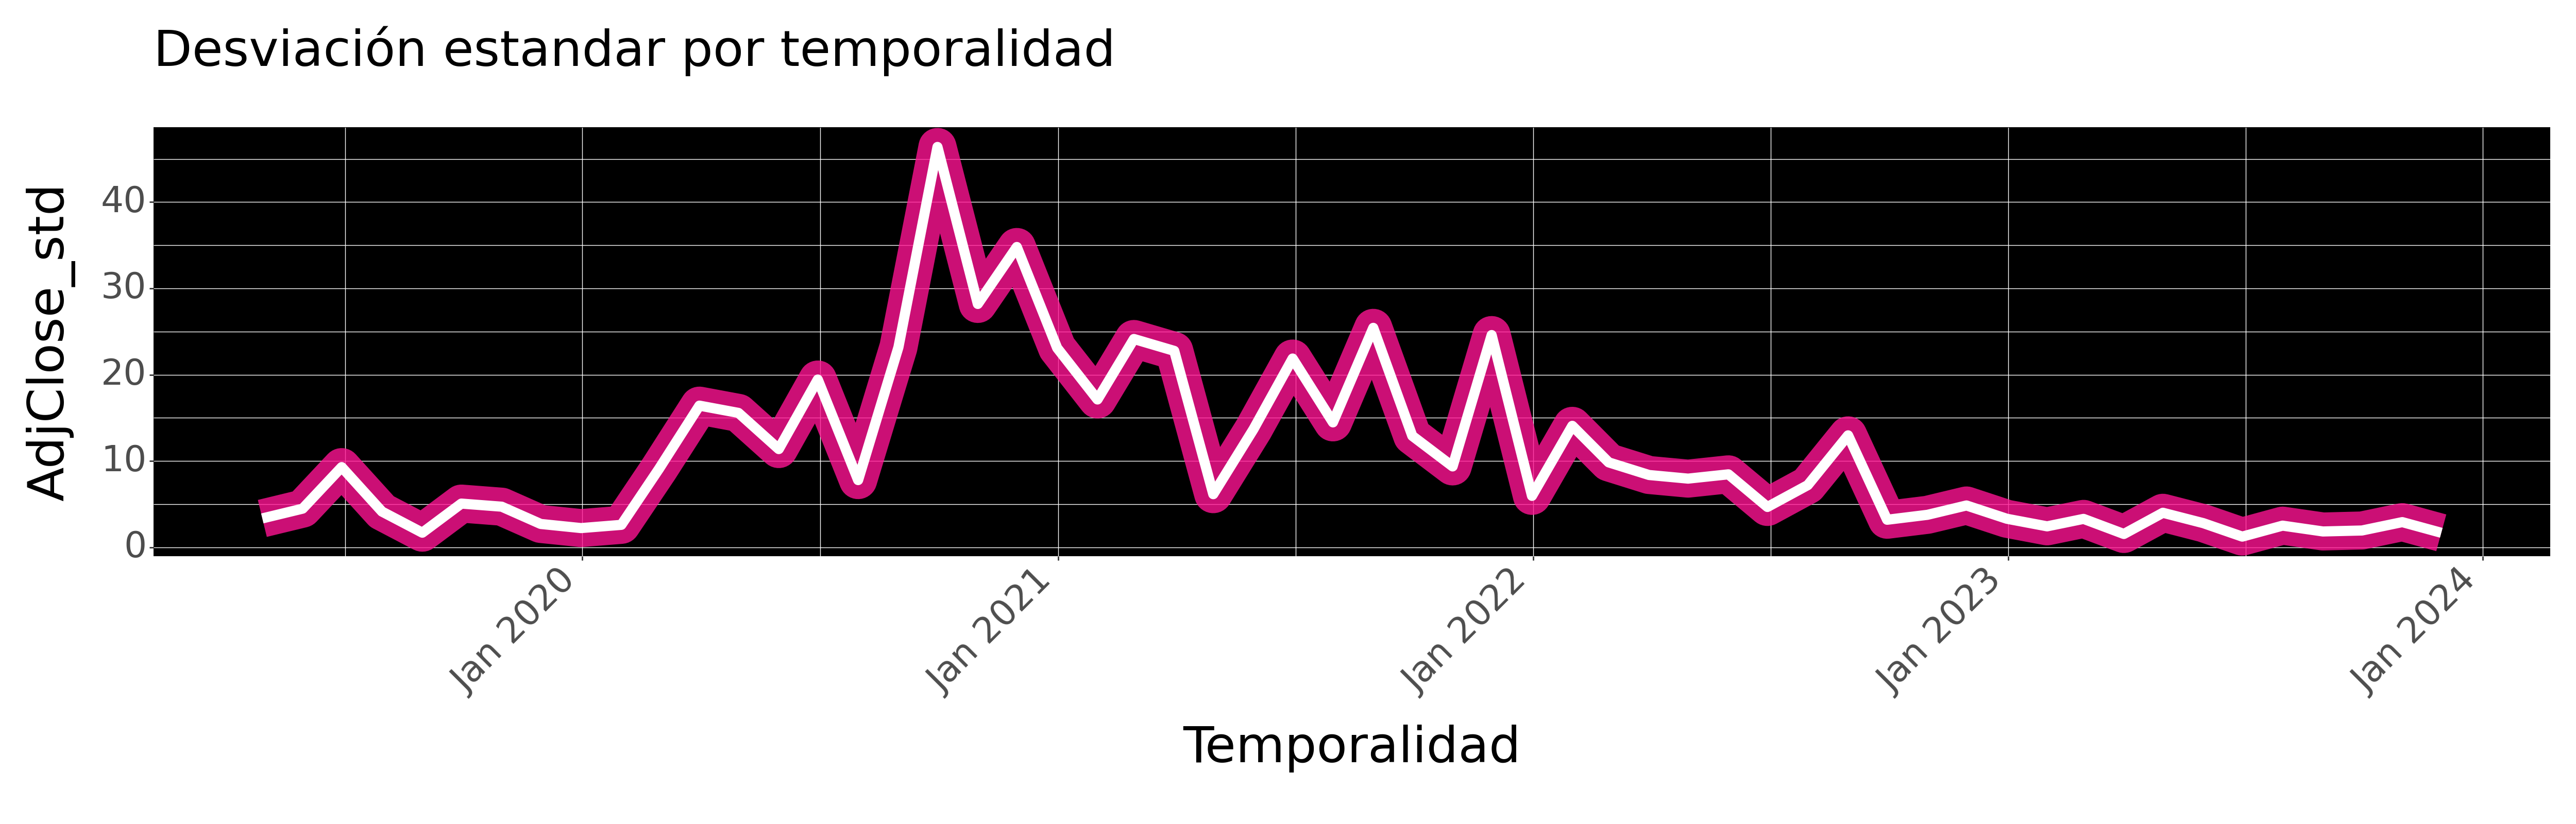

<Figure Size: (2500 x 800)>

In [ ]:
#Graficamos y observamos  como fue la desviacion estandar del precio de cierre ajustado  ("AdjCLose")
#dependiendo del periodo seleccionado.
(ggplot(Estadisticas, aes(x='Temporalidad',group=1)) +
geom_line(aes(y='AdjClose_std'), color="#FF1493", size=15, alpha=0.8) +
geom_line(aes(y='AdjClose_std'),color="white",size=4)+
ggtitle('Desviación estandar por temporalidad')+
theme(figure_size=(25, 8),panel_background=element_rect(fill="black"),panel_grid=element_line(color="white", size=0.5),
axis_text_x=element_text(size=25, angle=45, hjust=1),
axis_text_y=element_text(size=25),
plot_title=element_text(size=35),
axis_title_x=element_text(size=35),
axis_title_y=element_text(size=35))+
scale_x_date(date_breaks="1 year", date_labels="%b %Y"))

In [ ]:
#Creamos un grafico de velas apra una mejor visualización de los datos obtenidos, usaremos plotly en vez de ggplot.
#Este grafico permite visualizar el precio de apertura,el precio de cierre  y el máximo y el mínimo, podemos ajustar
#el eje x a la fecha que se requiera.

In [ ]:
# Crear un gráfico de velas con plotly
GraficoVelas = go.Figure(data=[go.Candlestick(x=df['Date'],open=df['Open'],high=df['High'],low=df['Low'],close=df['Close'])])


GraficoVelas.update_layout(title=f'Gráfico de Velas para {Ticker}',xaxis_title='Fecha',yaxis_title='Precio',
template='plotly_dark')

GraficoVelas.show()

In [ ]:
#Creamos graficos de cajas para el precio de cierre ajustado.
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
# Estas lineas de codigo crearán dos columnas adicionales, 'Year' y 'Month',
#en donde aparecerá el año y el mes de cada fecha de la columna 'Date'.

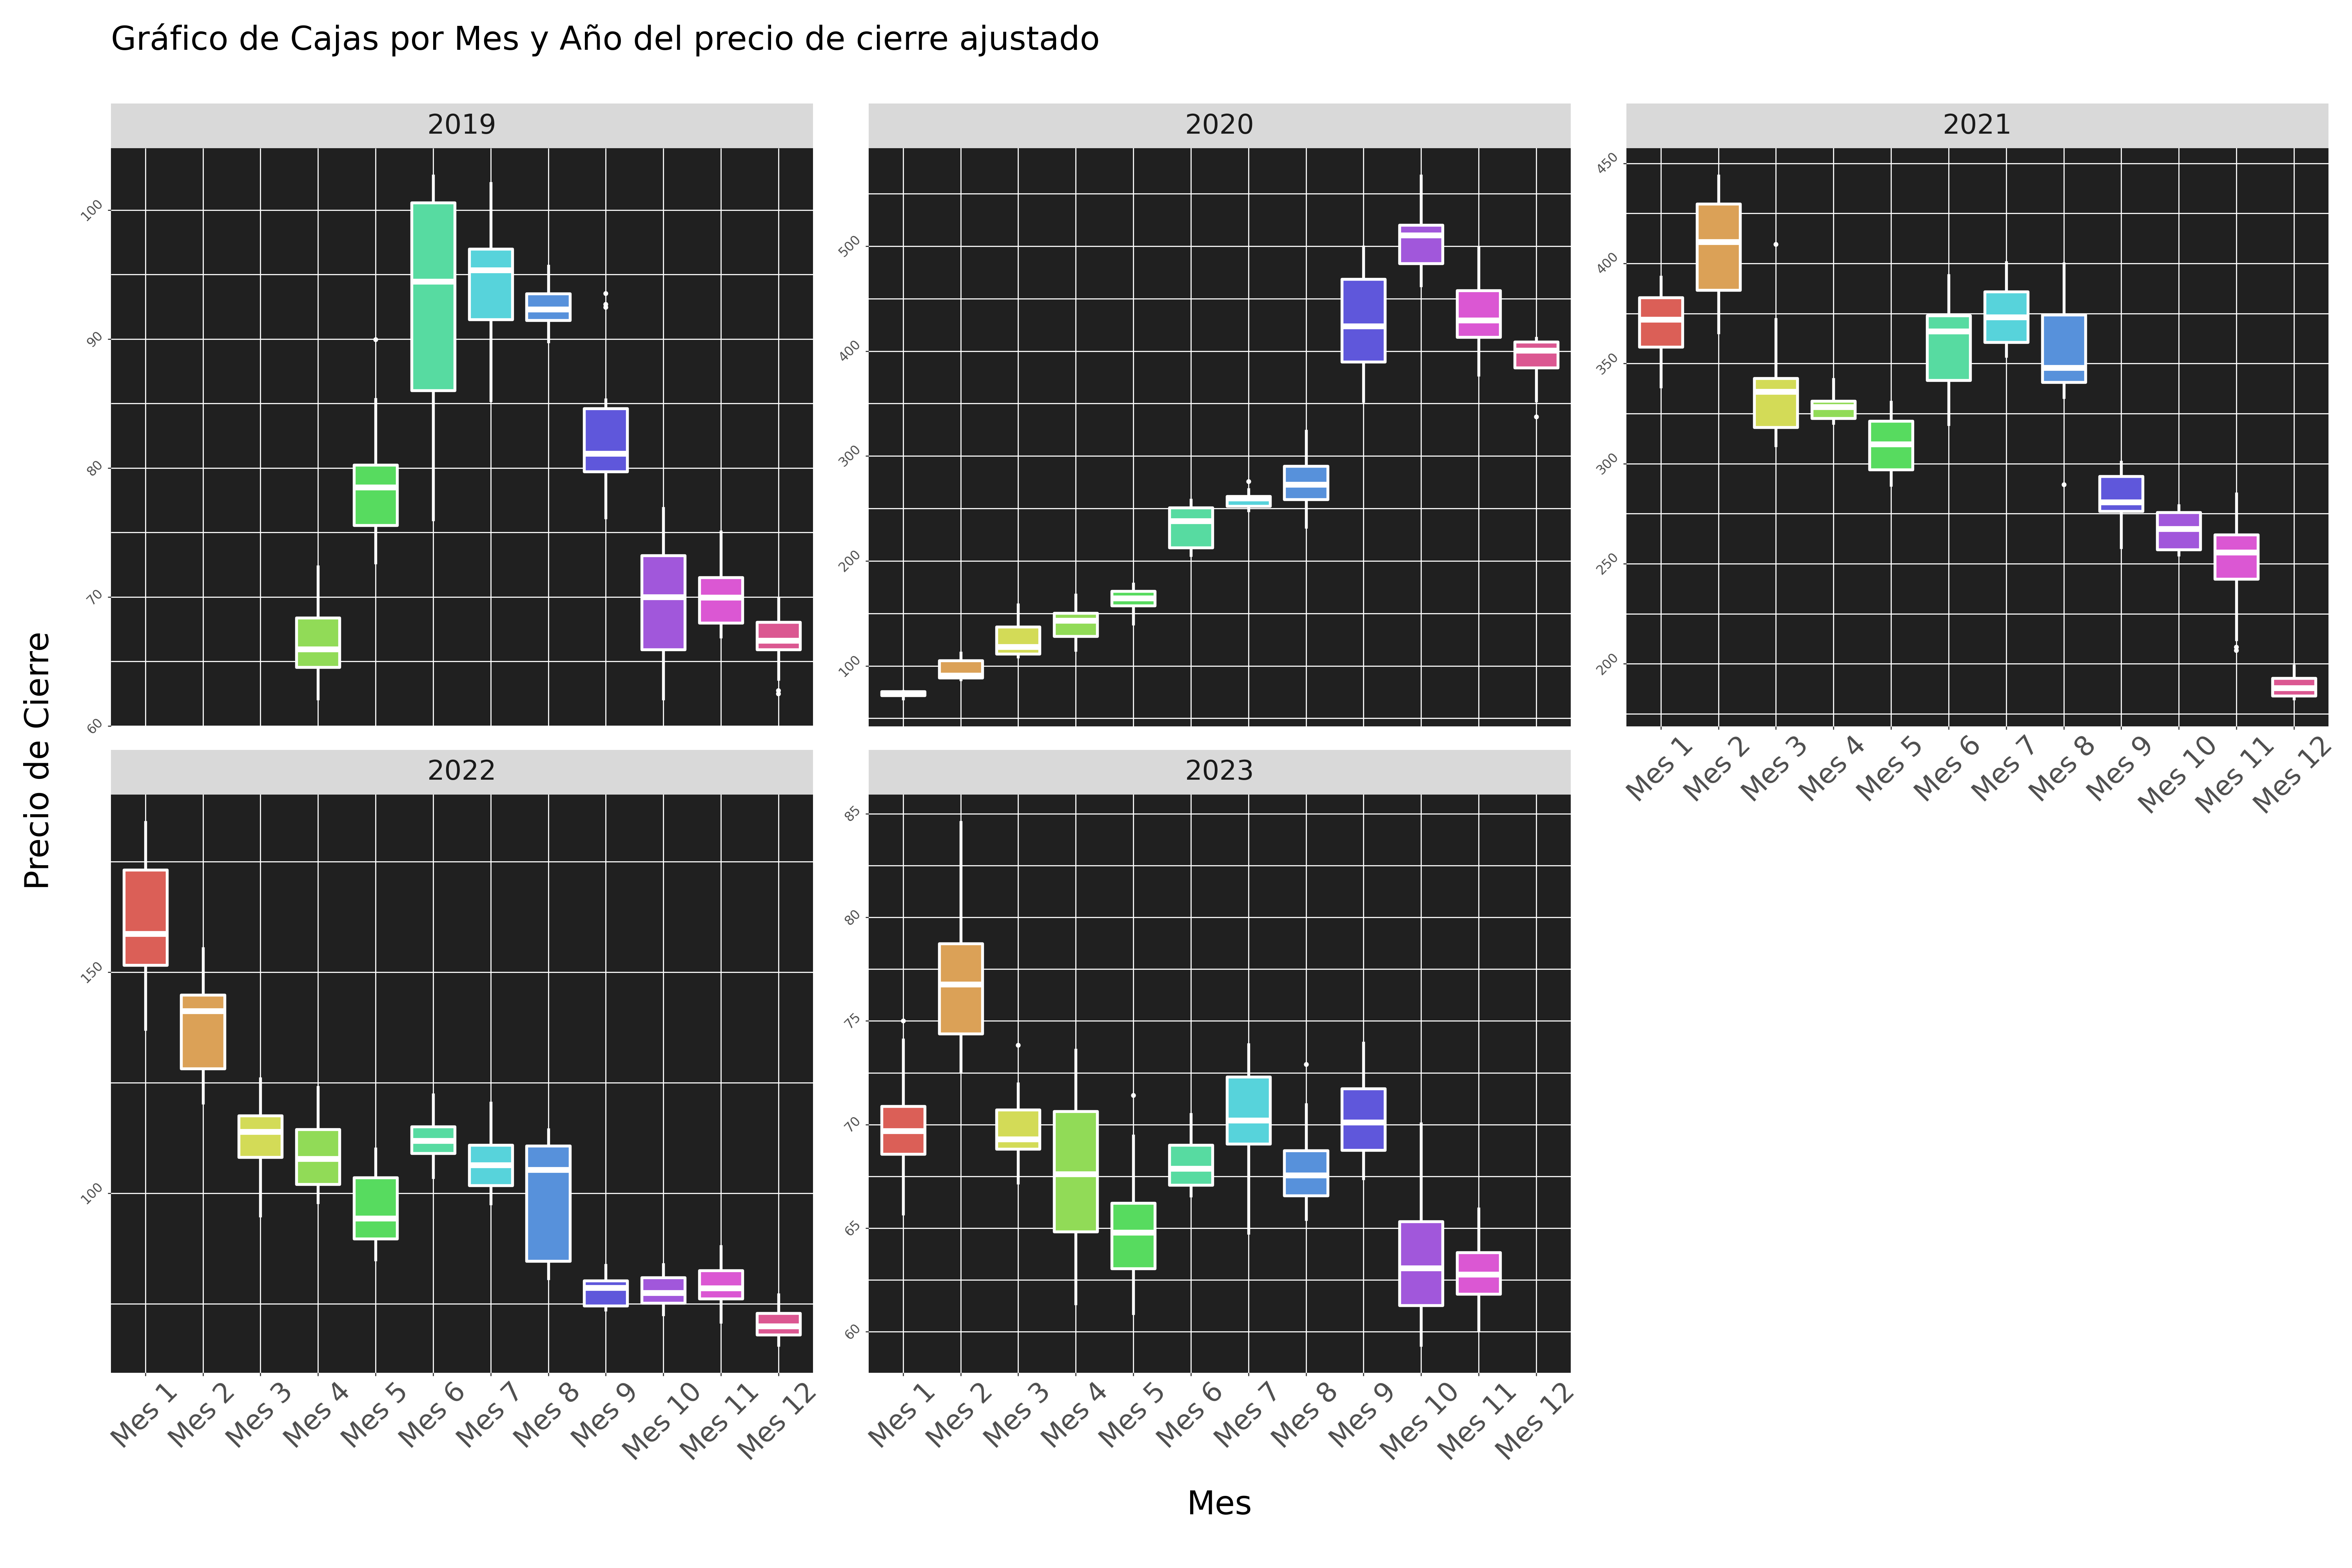

<Figure Size: (3000 x 2000)>

In [ ]:
#Creamos un grafico con subgraficos de cajas usando facet_wrap con ggplot.
(ggplot(df, aes(x='factor(Month)', y='Close', fill='factor(Month)')) +geom_boxplot(color='white', size=1.5, show_legend=False) +
labs(x='Mes', y='Precio de Cierre', title='Gráfico de Cajas por Mes y Año del precio de cierre ajustado') +
theme(figure_size=(30, 20),panel_background=element_rect(fill="#202020"),panel_grid=element_line(color="white", size=1),
axis_text=element_text(size=12,angle=45),  title=element_text(size=30),axis_text_x=element_text(size=25),
strip_text=element_text(size=25)) +scale_x_discrete(name='Mes', labels=[f'Mes {i}' for i in range(1, 13)]) +
facet_wrap('~Year', scales='free_y'))

In [ ]:
#Mostramos nuestro dataframe original
df3.head()

,Date,Open,High,Low,Close,AdjClose,Volume
0,2019-04-18,65.000000,66.000000,60.320999,62.000000,62.000000,25764700
1,2019-04-22,61.000000,68.900002,59.939999,65.699997,65.699997,9949700
2,2019-04-23,66.870003,74.168999,65.550003,69.000000,69.000000,6786500
3,2019-04-24,71.400002,71.500000,63.160000,63.200001,63.200001,4973500
4,2019-04-25,64.739998,66.849998,62.599998,65.000000,65.000000,3863300


In [ ]:
#Crearemos una matriz de correlacion para ver como se relaciona cada columna de nuestro dataframe original, seleccionamos
#las columnas: Open,High,Low,AdjClose,Volume, usando la tubería "">>"" de Siuba
df3=df3>>select(_.Open,_.High,_.Low,_.AdjClose,_.Volume)
df3.head()

,Open,High,Low,AdjClose,Volume
0,65.000000,66.000000,60.320999,62.000000,25764700
1,61.000000,68.900002,59.939999,65.699997,9949700
2,66.870003,74.168999,65.550003,69.000000,6786500
3,71.400002,71.500000,63.160000,63.200001,4973500
4,64.739998,66.849998,62.599998,65.000000,3863300


In [ ]:
#Creamos la matriz de correlación usando .corr() y la mostramos
MatrizCorrelacion=df3.corr()
MatrizCorrelacion

,Open,High,Low,AdjClose,Volume
Open,1.000000,0.999425,0.999220,0.998510,0.237205
High,0.999425,1.000000,0.999175,0.999296,0.249076
Low,0.999220,0.999175,1.000000,0.999383,0.225337
AdjClose,0.998510,0.999296,0.999383,1.000000,0.238693
Volume,0.237205,0.249076,0.225337,0.238693,1.000000


In [ ]:
#La función melt() se utiliza para convertir un DataFrame de formato ancho a formato largo.
#en el formato largo, las variables que anteriormente estaban distribuidas en columnas
#se combinan en una sola columna y se agrega una columna adicional para indicar la variable original.

df4=pd.melt(MatrizCorrelacion.reset_index(), id_vars='index')
df4=df4.rename(columns={"index":"x","variable":"y","value":"Correlacion"})
df4.head(10)

,x,y,Correlacion
0,Open,Open,1.000000
1,High,Open,0.999425
2,Low,Open,0.999220
3,AdjClose,Open,0.998510
4,Volume,Open,0.237205
5,Open,High,0.999425
6,High,High,1.000000
7,Low,High,0.999175
8,AdjClose,High,0.999296
9,Volume,High,0.249076


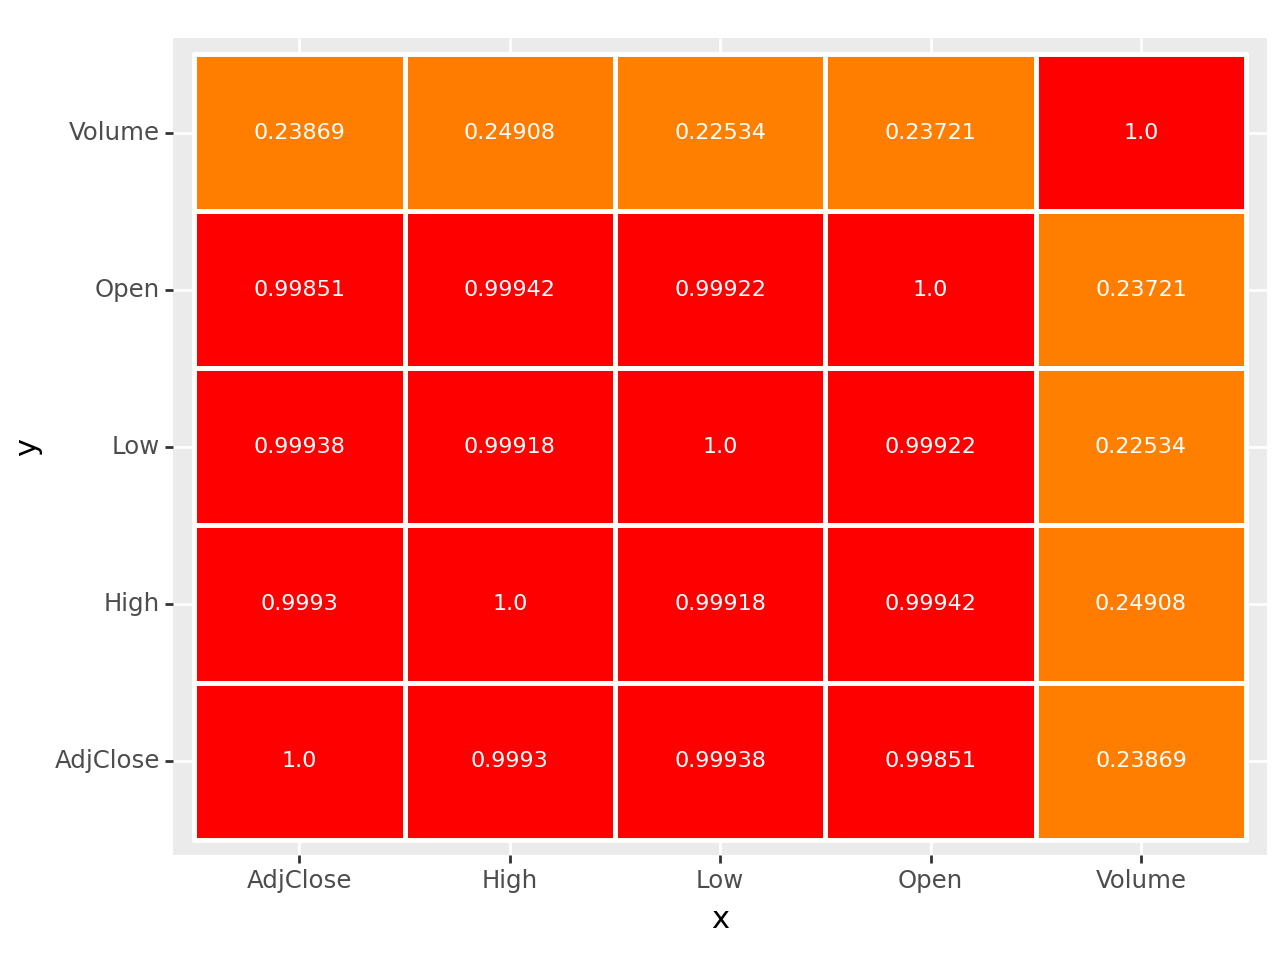

<Figure Size: (640 x 480)>

In [ ]:
#Usaremos ggplot para crear nuestro grafico de calor, donde el color rojo indica una correlación alta,
#el color naranja una correlación media y el color blanco una correlación baja.
(ggplot(df4, aes(x='x', y='y', fill='Correlacion')) +geom_tile(color="white",size=1) +
    geom_text(aes(label='round(Correlacion, 5)'), color="white", size=8) +
    scale_fill_gradient2(low="white", mid="orange", high="red", guide=False))

In [ ]:
#Visualizamos el volumen de Acciones, en este caso, agruparemos nuestros datos por año o por mes, además
#sumaremos el volumen de las acciones dependiendo de la temporalidad.
datos_agrupados= df.groupby(pd.Grouper(key='Date', freq='M'))['Volume'].sum().reset_index()
datos_agrupados.head()

,Date,Volume
0,2019-04-30,58800500
1,2019-05-31,53272300
2,2019-06-30,65083800
3,2019-07-31,51611900
4,2019-08-31,23417000


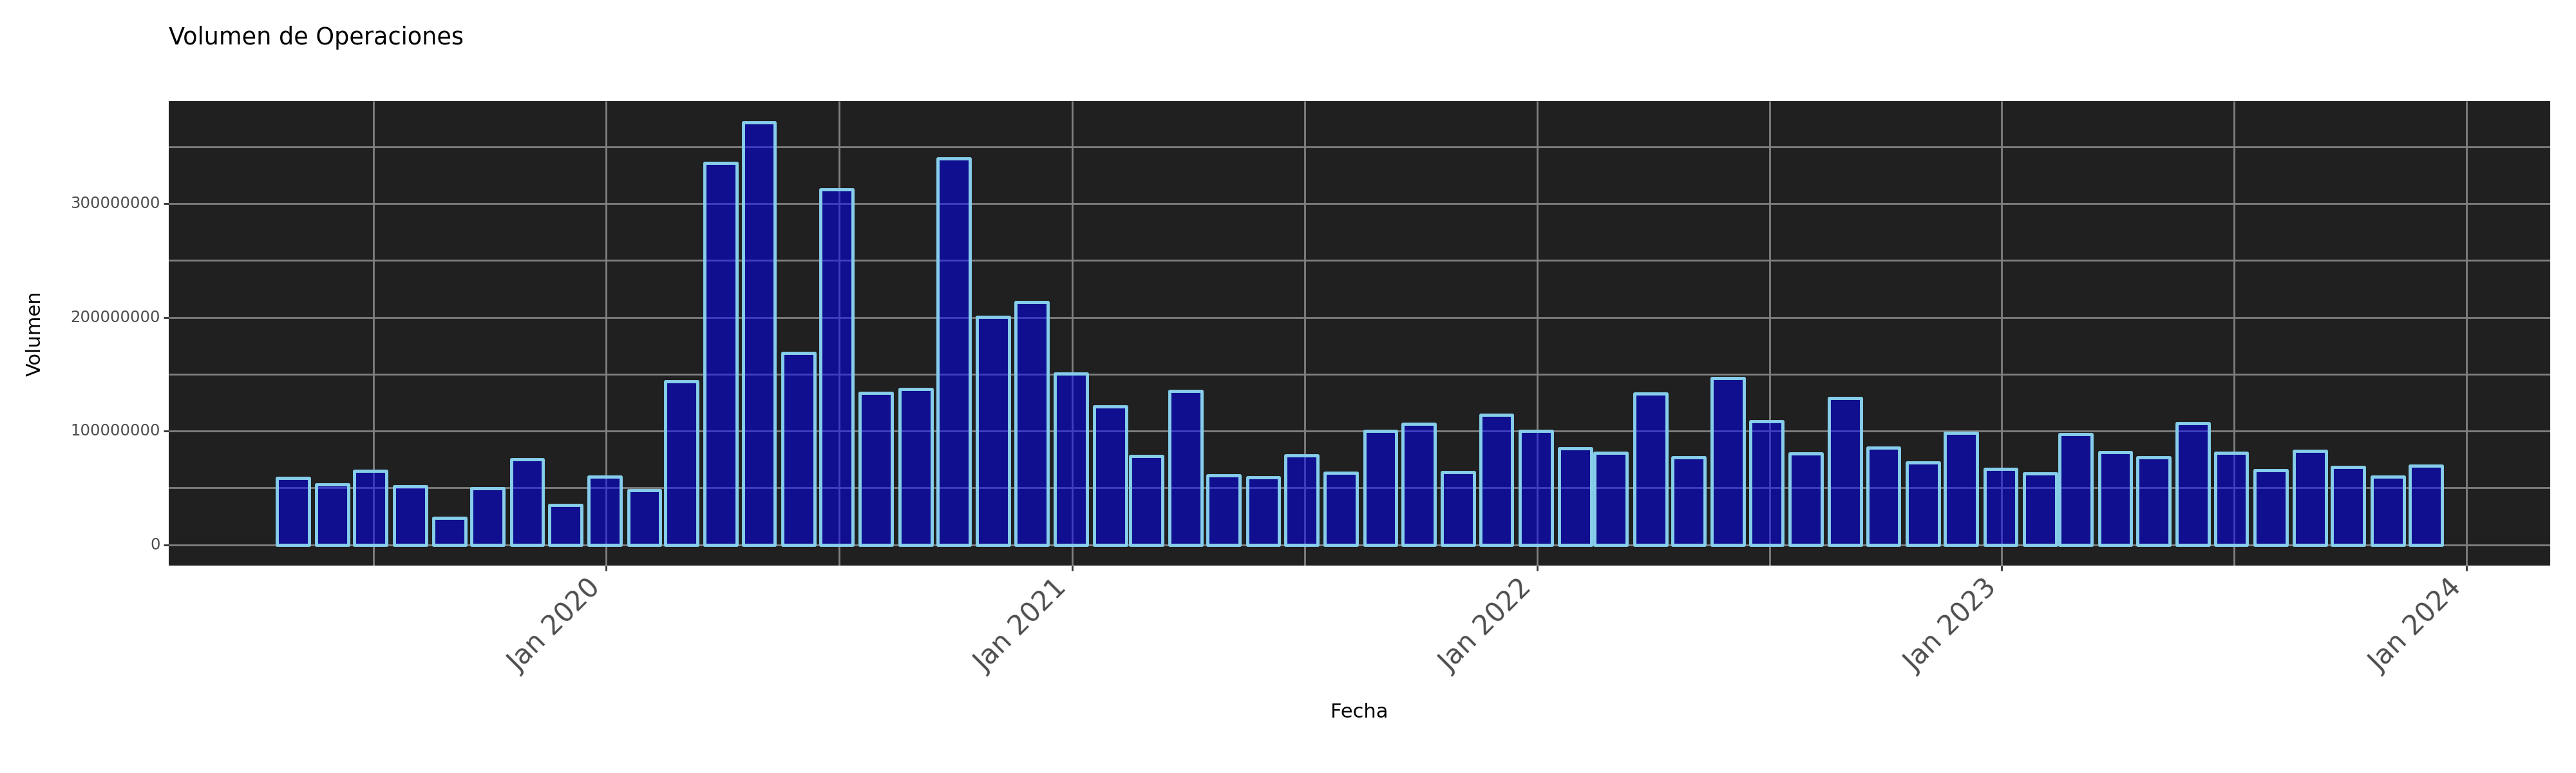

<Figure Size: (2000 x 600)>

In [ ]:
#Ahora graficamos el volumen de las acciones con ggplot:
(ggplot(datos_agrupados)
    + aes(x='Date', y='Volume')
    + geom_bar(stat='identity', fill="blue",color="#87CEEB", size=1,alpha=0.5)
    + labs(title='Volumen de Operaciones', x='Fecha', y='Volumen')
    +theme(figure_size=(20, 6),axis_text_x=element_text(size=15, angle=45, hjust=1),
          panel_background=element_rect(fill="#202020"),
        panel_grid=element_line(color="grey", size=1))
    + scale_x_date(date_breaks="1 year", date_labels="%b %Y")
)

#PREDICCIÓN CON PROPHET

In [ ]:
#Mostramos nuestros datos originales
df

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month
0,2019-04-18,65.000000,66.000000,60.320999,62.000000,62.000000,25764700,2019,4
1,2019-04-22,61.000000,68.900002,59.939999,65.699997,65.699997,9949700,2019,4
2,2019-04-23,66.870003,74.168999,65.550003,69.000000,69.000000,6786500,2019,4
3,2019-04-24,71.400002,71.500000,63.160000,63.200001,63.200001,4973500,2019,4
4,2019-04-25,64.739998,66.849998,62.599998,65.000000,65.000000,3863300,2019,4
...,...,...,...,...,...,...,...,...,...
1155,2023-11-17,64.430000,64.760002,63.570000,64.120003,64.120003,4208900,2023,11
1156,2023-11-20,64.589996,66.080002,64.480003,66.000000,66.000000,10633100,2023,11
1157,2023-11-21,63.660000,66.550003,61.830002,65.940002,65.940002,13812400,2023,11
1158,2023-11-22,66.050003,66.529999,63.770000,63.830002,63.830002,5094700,2023,11


In [ ]:
#Seleccionamos el precio de cierre ajustado y la fecha y las renombramos como "ds"y "y" ya que así nos los pide Prophet
df=df>>mutate(**{"AdjClose":df["Adj Close"]})>>select("Date","AdjClose")>>rename(ds=_.Date,y=_.AdjClose)
df.head()

,ds,y
0,2019-04-18,62.000000
1,2019-04-22,65.699997
2,2019-04-23,69.000000
3,2019-04-24,63.200001
4,2019-04-25,65.000000


In [ ]:
#Convertimos la columna de datos a tipo Datetime
df['ds'] = pd.to_datetime(df['ds'])
df.dtypes

ds    datetime64[ns]
y            float64
dtype: object

In [ ]:
#Modelamos con prophet usando la sintaxis de Siuba y visualizamos la predicción
model = Prophet()
model.fit(df >> mutate(ds=_.ds, y=_.y))
future = model.make_future_dataframe(periods=365)  # Simulación para el próximo año
forecast = model.predict(future)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcutpryd4/ha7ltt5c.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcutpryd4/_jvlahr_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97372', 'data', 'file=/tmp/tmpcutpryd4/ha7ltt5c.json', 'init=/tmp/tmpcutpryd4/_jvlahr_.json', 'output', 'file=/tmp/tmpcutpryd4/prophet_model8y3qz40t/prophet_model-20231125155716.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:57:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:57:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
fpb=Prophet(daily_seasonality=True)
fpb.fit(df)
future=fpb.make_future_dataframe(periods=365)
forecast=fpb.predict(future)


DEBUG:cmdstanpy:input tempfile: /tmp/tmpcutpryd4/4pnfd2a8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcutpryd4/a55vczjh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9638', 'data', 'file=/tmp/tmpcutpryd4/4pnfd2a8.json', 'init=/tmp/tmpcutpryd4/a55vczjh.json', 'output', 'file=/tmp/tmpcutpryd4/prophet_modelq9d8mefd/prophet_model-20231125155720.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:57:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:57:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
from prophet.plot import plot_plotly
plot_plotly(fpb,forecast)

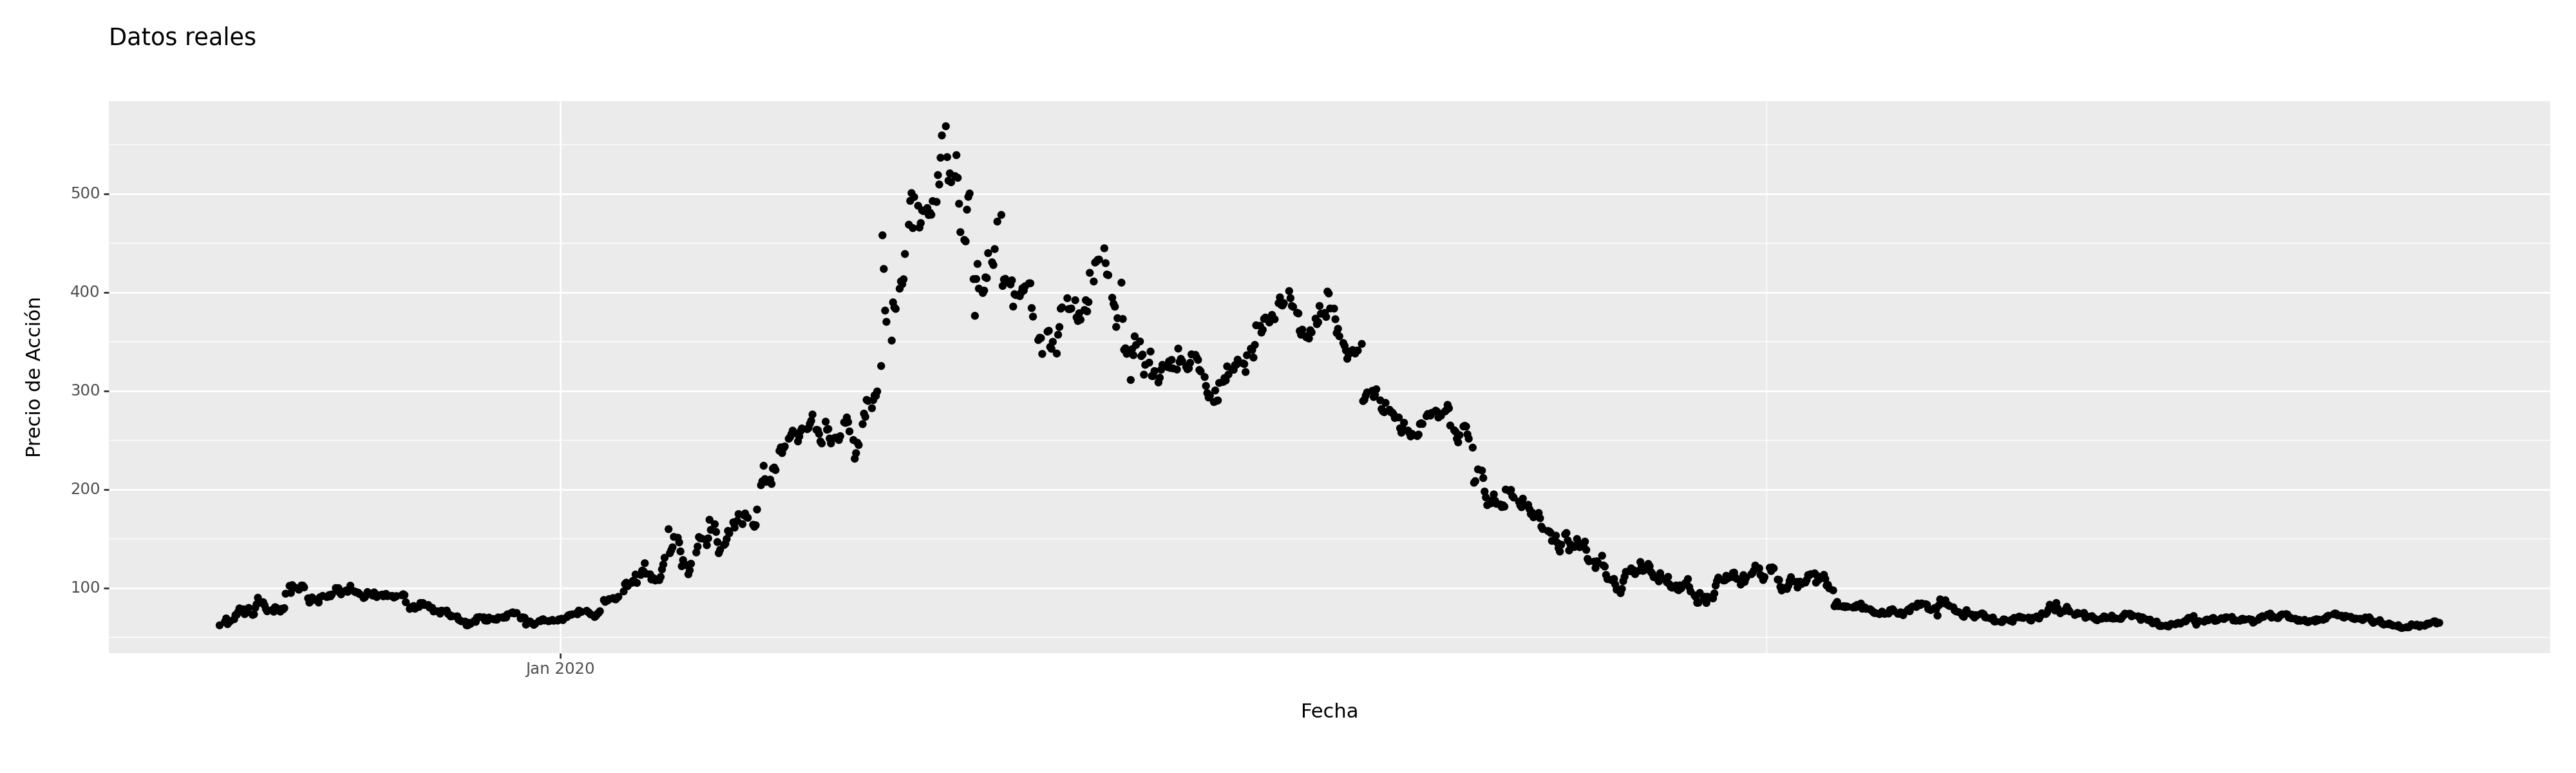

<Figure Size: (2000 x 600)>

In [ ]:
#Los puntos negros en el gráfico representan los datos originales que se usaron para ajustar el modelo.
#Cada punto muestra un valor real de la serie temporal con su fecha correspondiente.
(df
  >> ggplot(aes(x='ds', y='y'))
  + geom_point(color='black')
  + labs(title='Datos reales', x='Fecha', y='Precio de Acción')
  + theme(figure_size=(20, 6))
  + scale_x_date(date_breaks="5 years", date_labels="%b %Y")
)

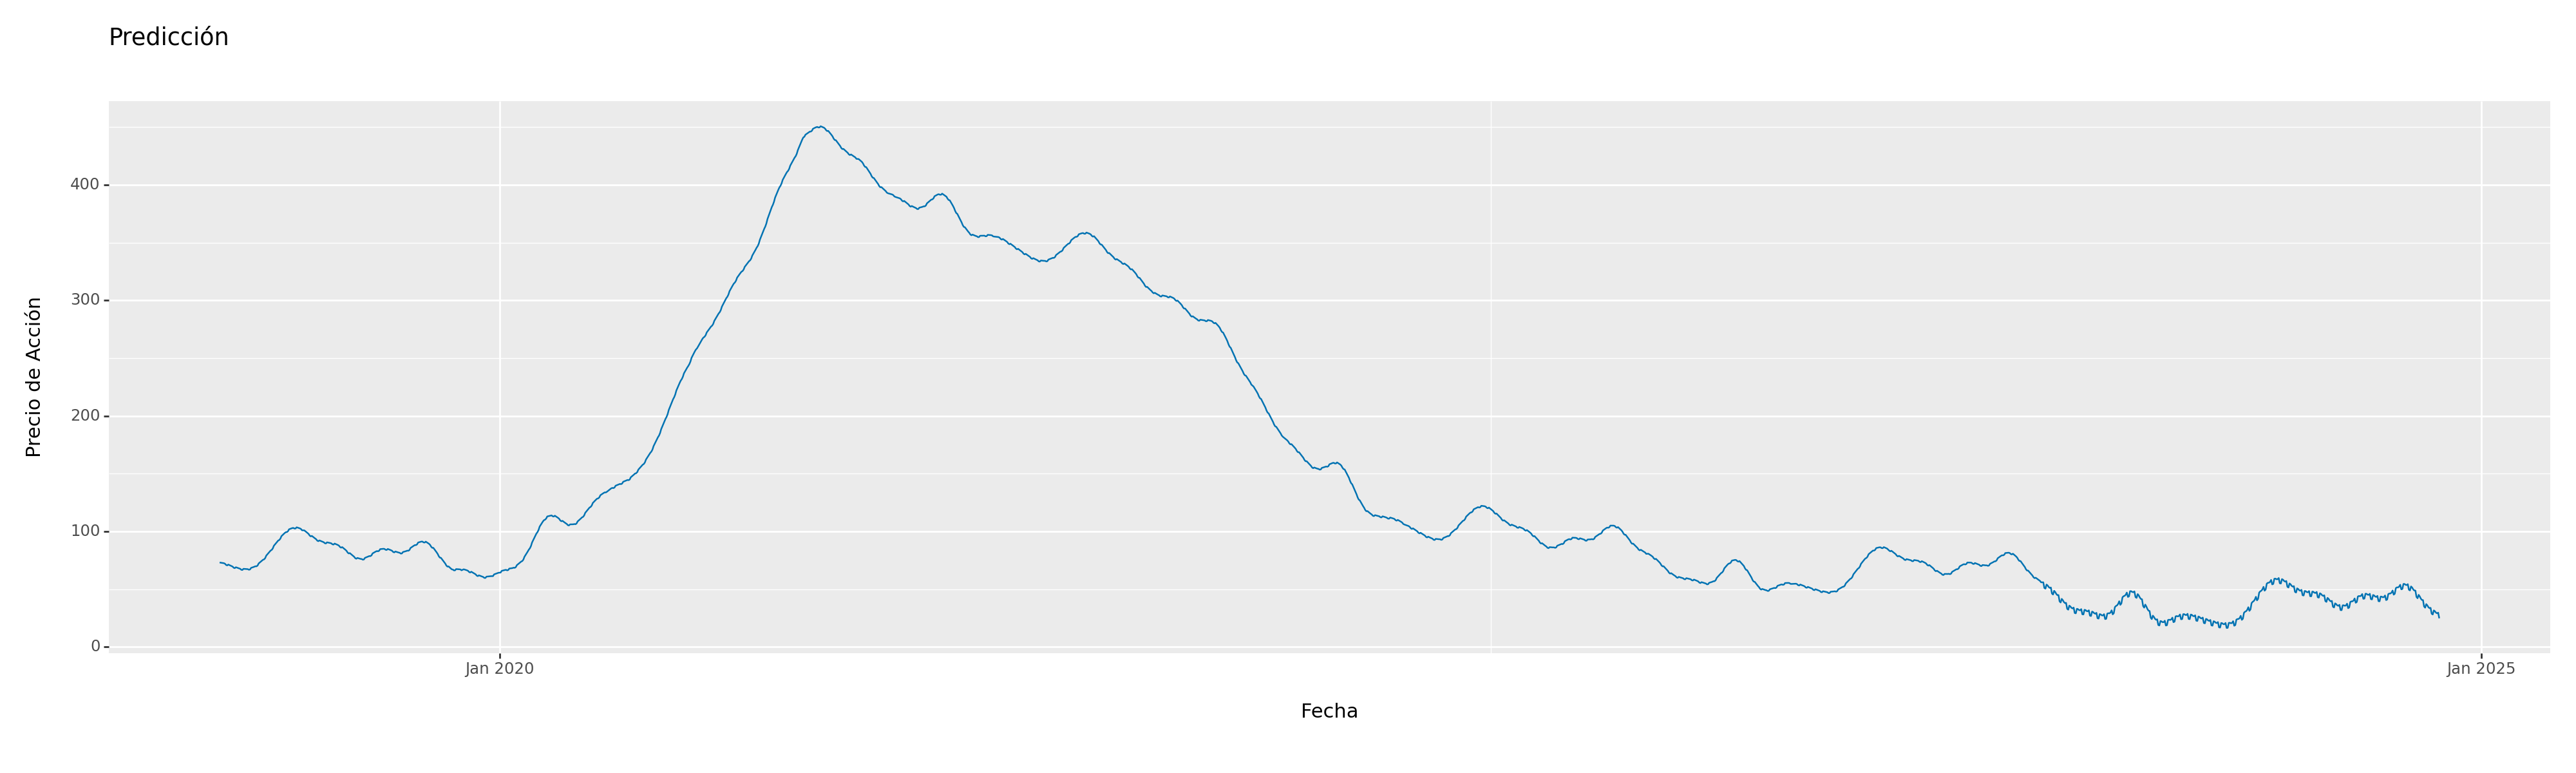

<Figure Size: (2000 x 600)>

In [ ]:
#La linea azul en el gráfico representa la predicción del modelo.
(ggplot(forecast)
     + aes(x='ds', y='yhat')
 +labs(title='Predicción', x='Fecha', y='Precio de Acción')
  + theme(figure_size=(20, 6))
     + geom_line(color='#0072B2')
 + scale_x_date(date_breaks="5 years", date_labels="%b %Y"))

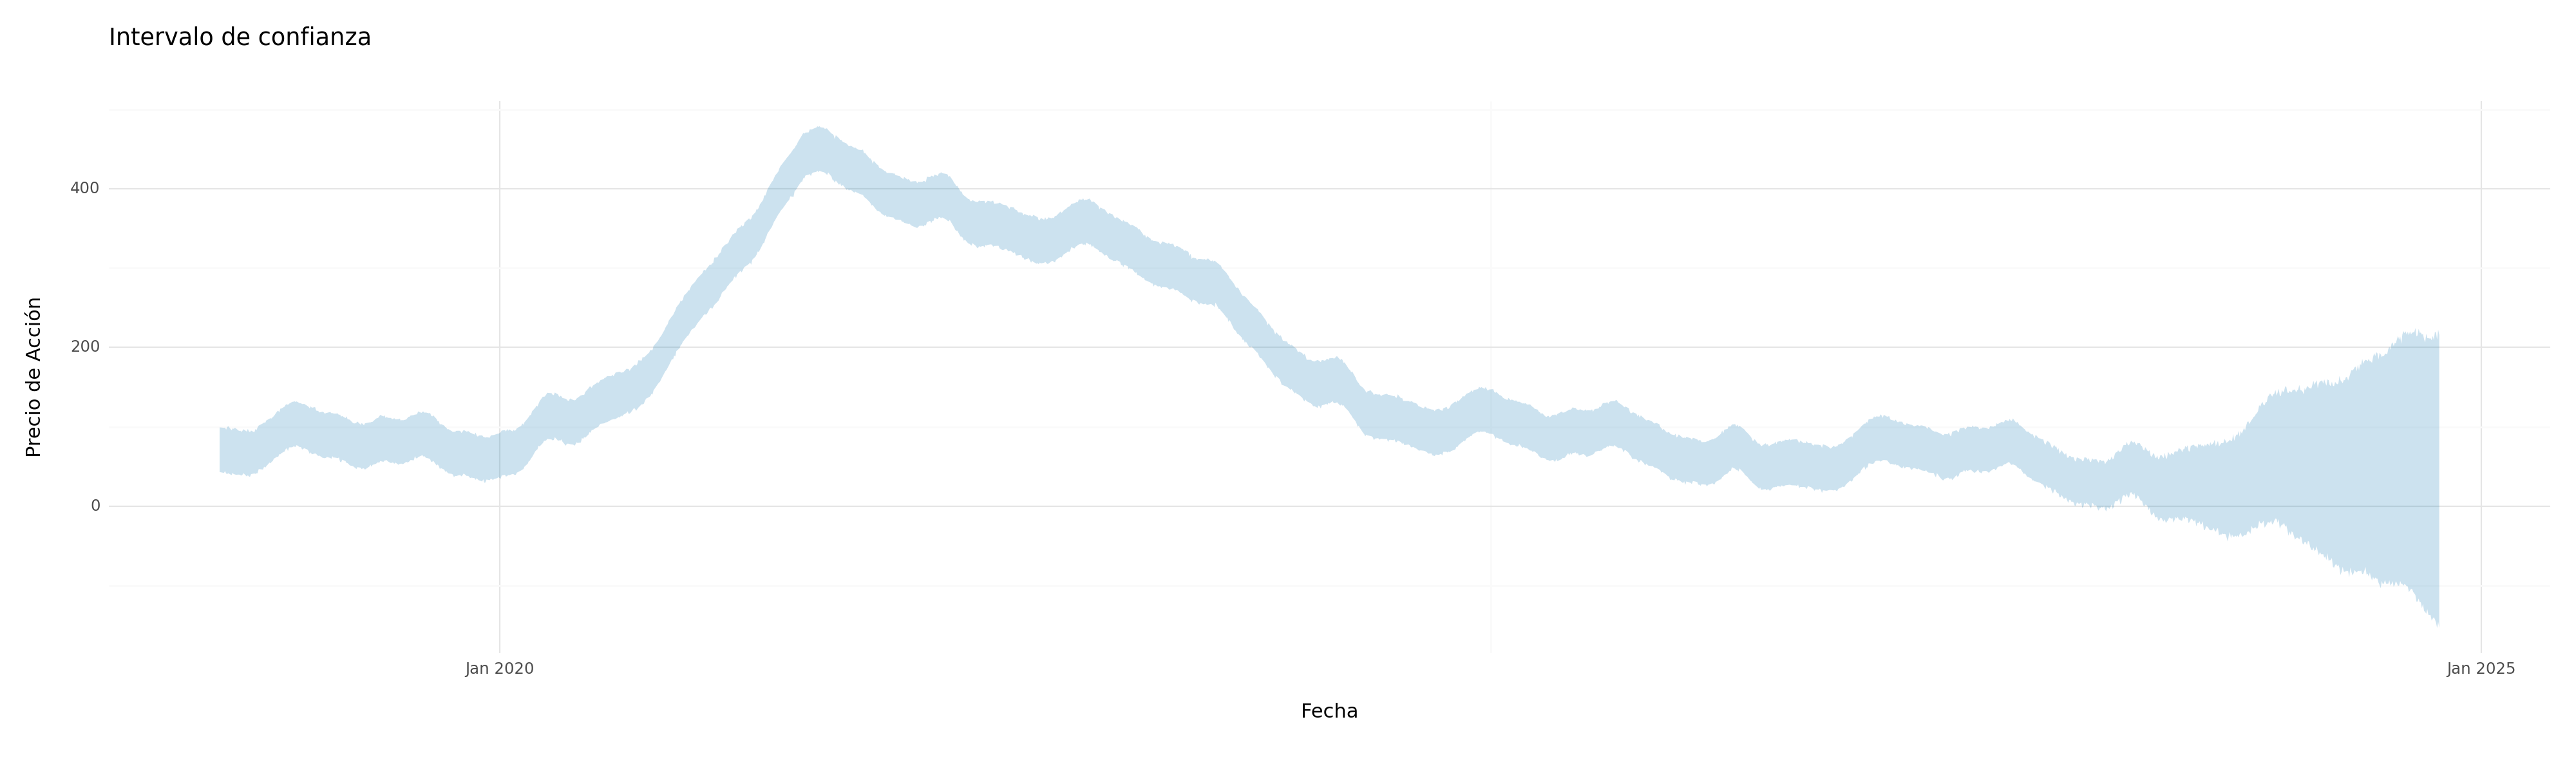

<Figure Size: (2000 x 600)>

In [ ]:
#El area azul desvanecida en el grafico representa  la incertidumbre o el intervalo de confianza alrededor de las predicciones.
(ggplot(forecast)
 + aes(x='ds', y='yhat')
 + geom_ribbon(aes(ymin='yhat_lower', ymax='yhat_upper'), fill='#0072B2', alpha=0.2)
 + labs(title='Intervalo de confianza', x='Fecha', y='Precio de Acción')
 + theme_minimal()
 +theme(legend_position="top",figure_size=(20,6))
  + scale_x_date(date_breaks="5 years", date_labels="%b %Y")
)

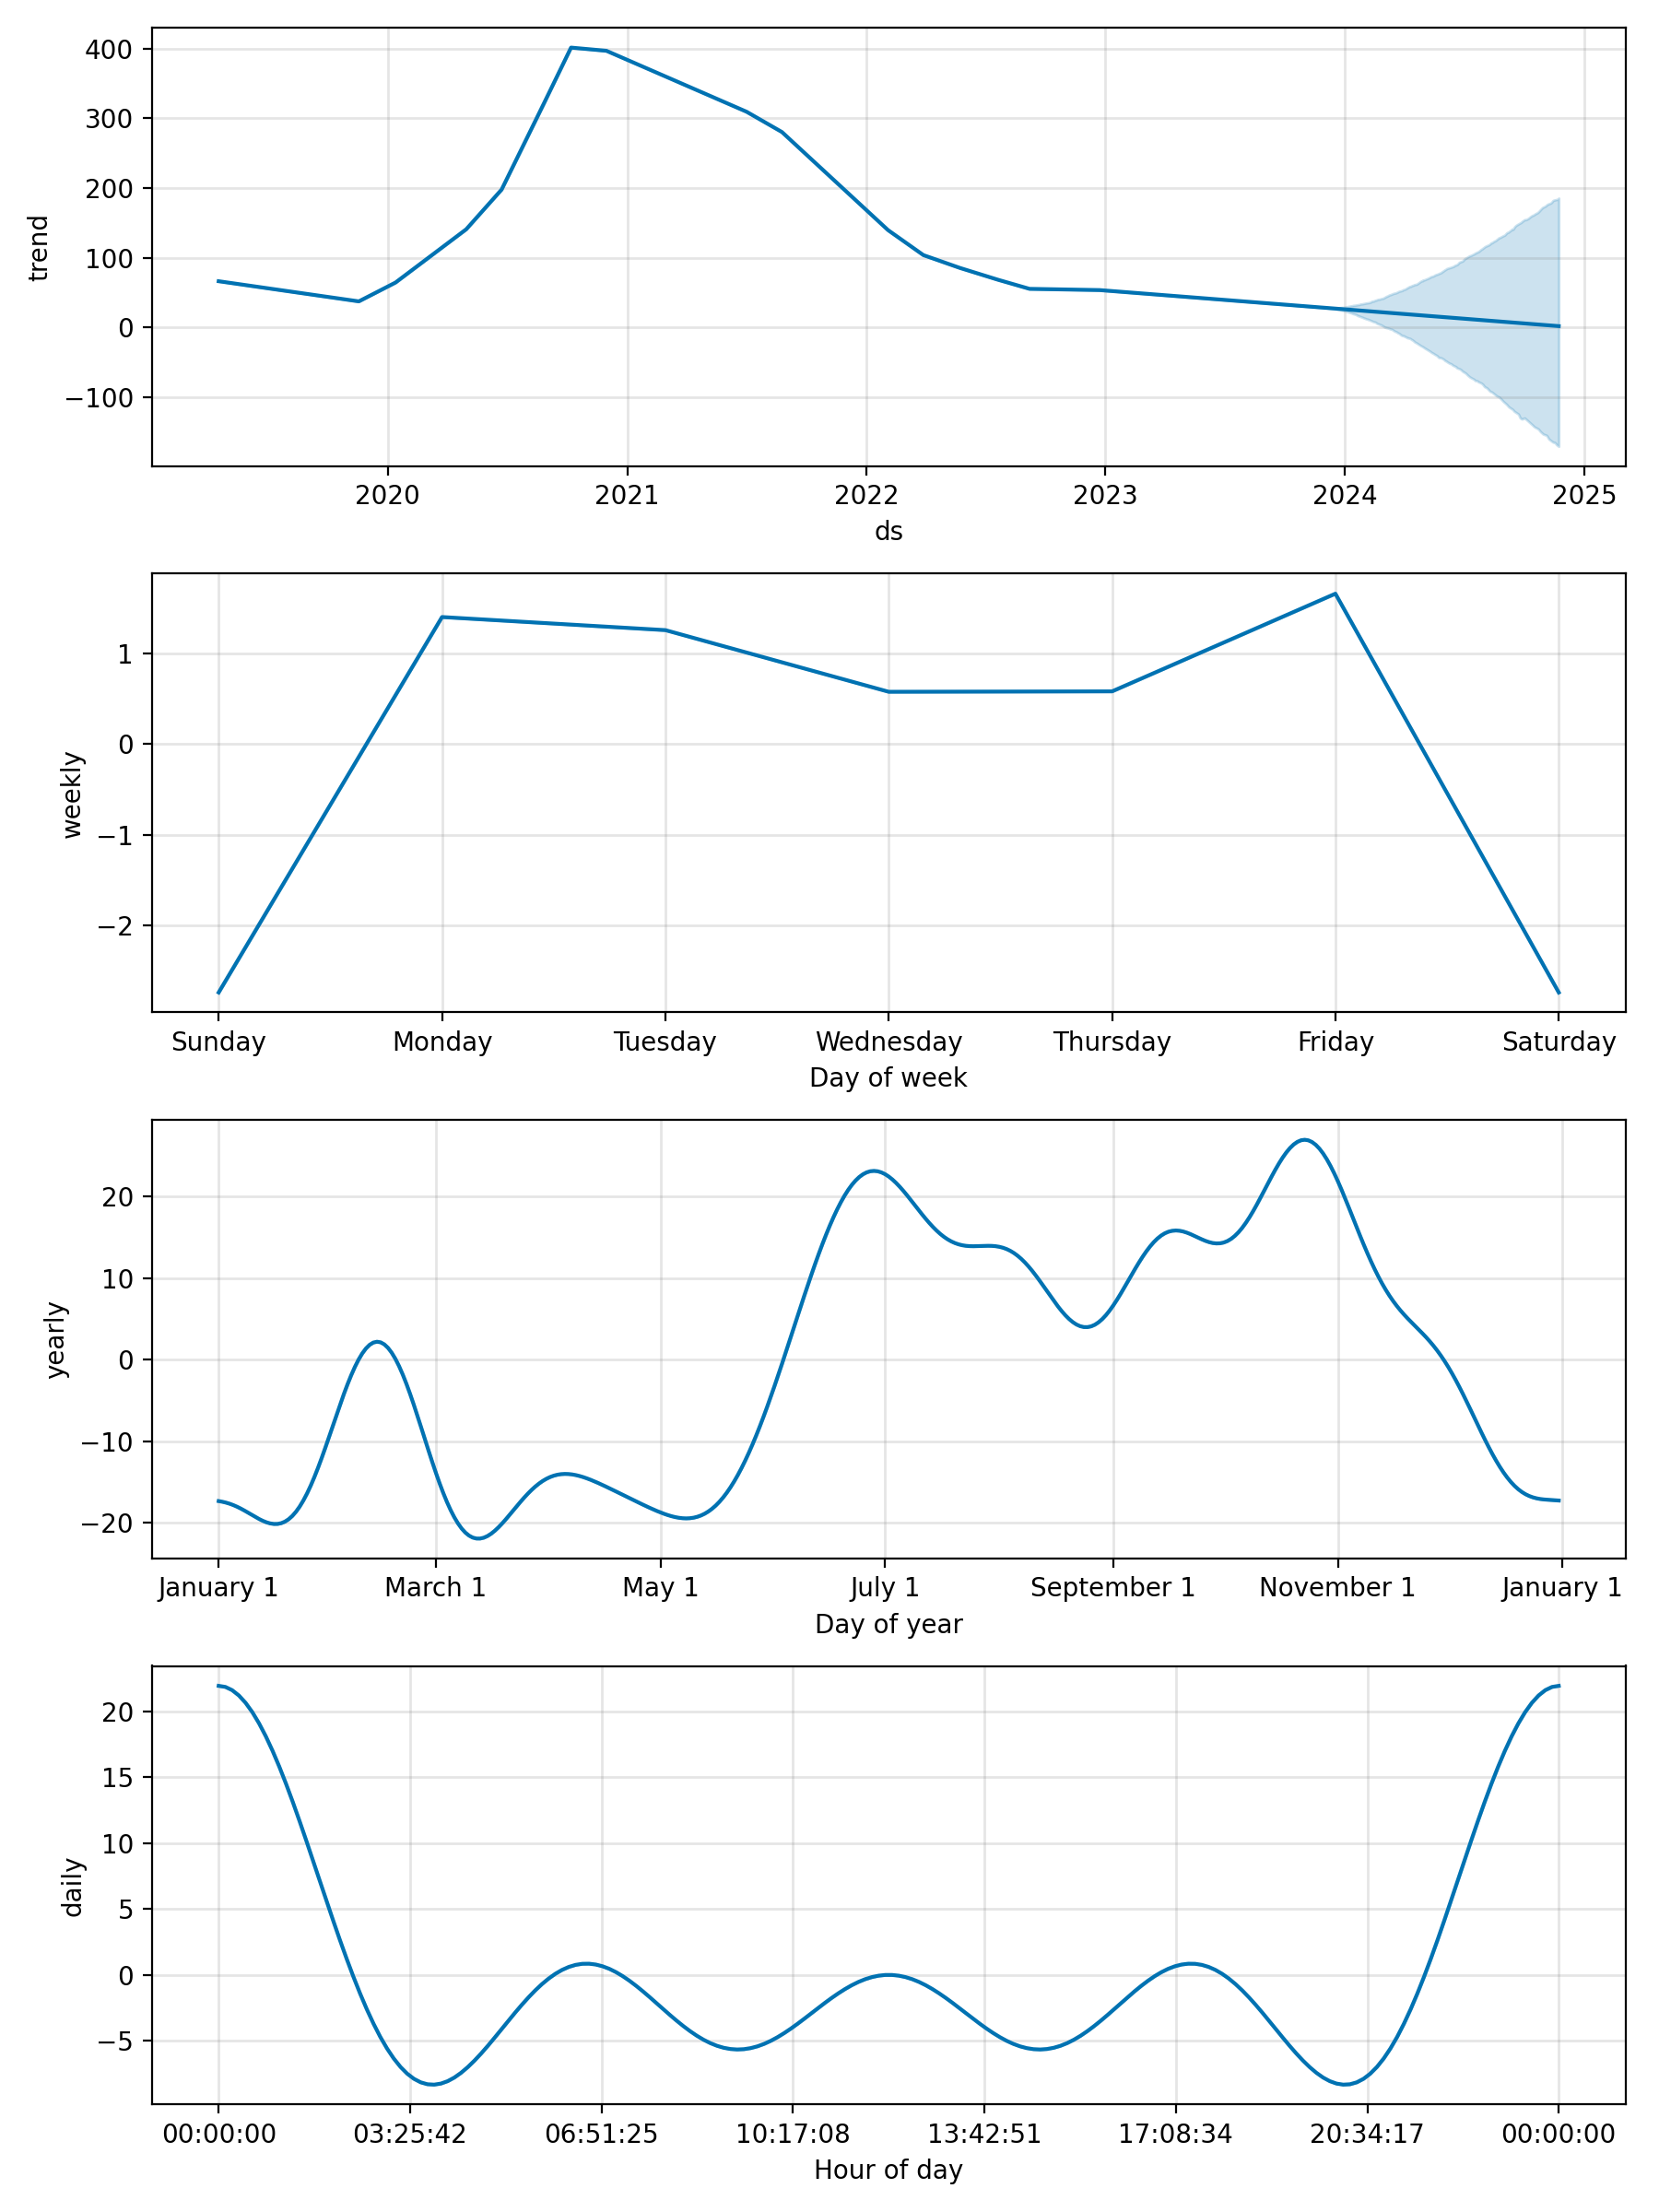

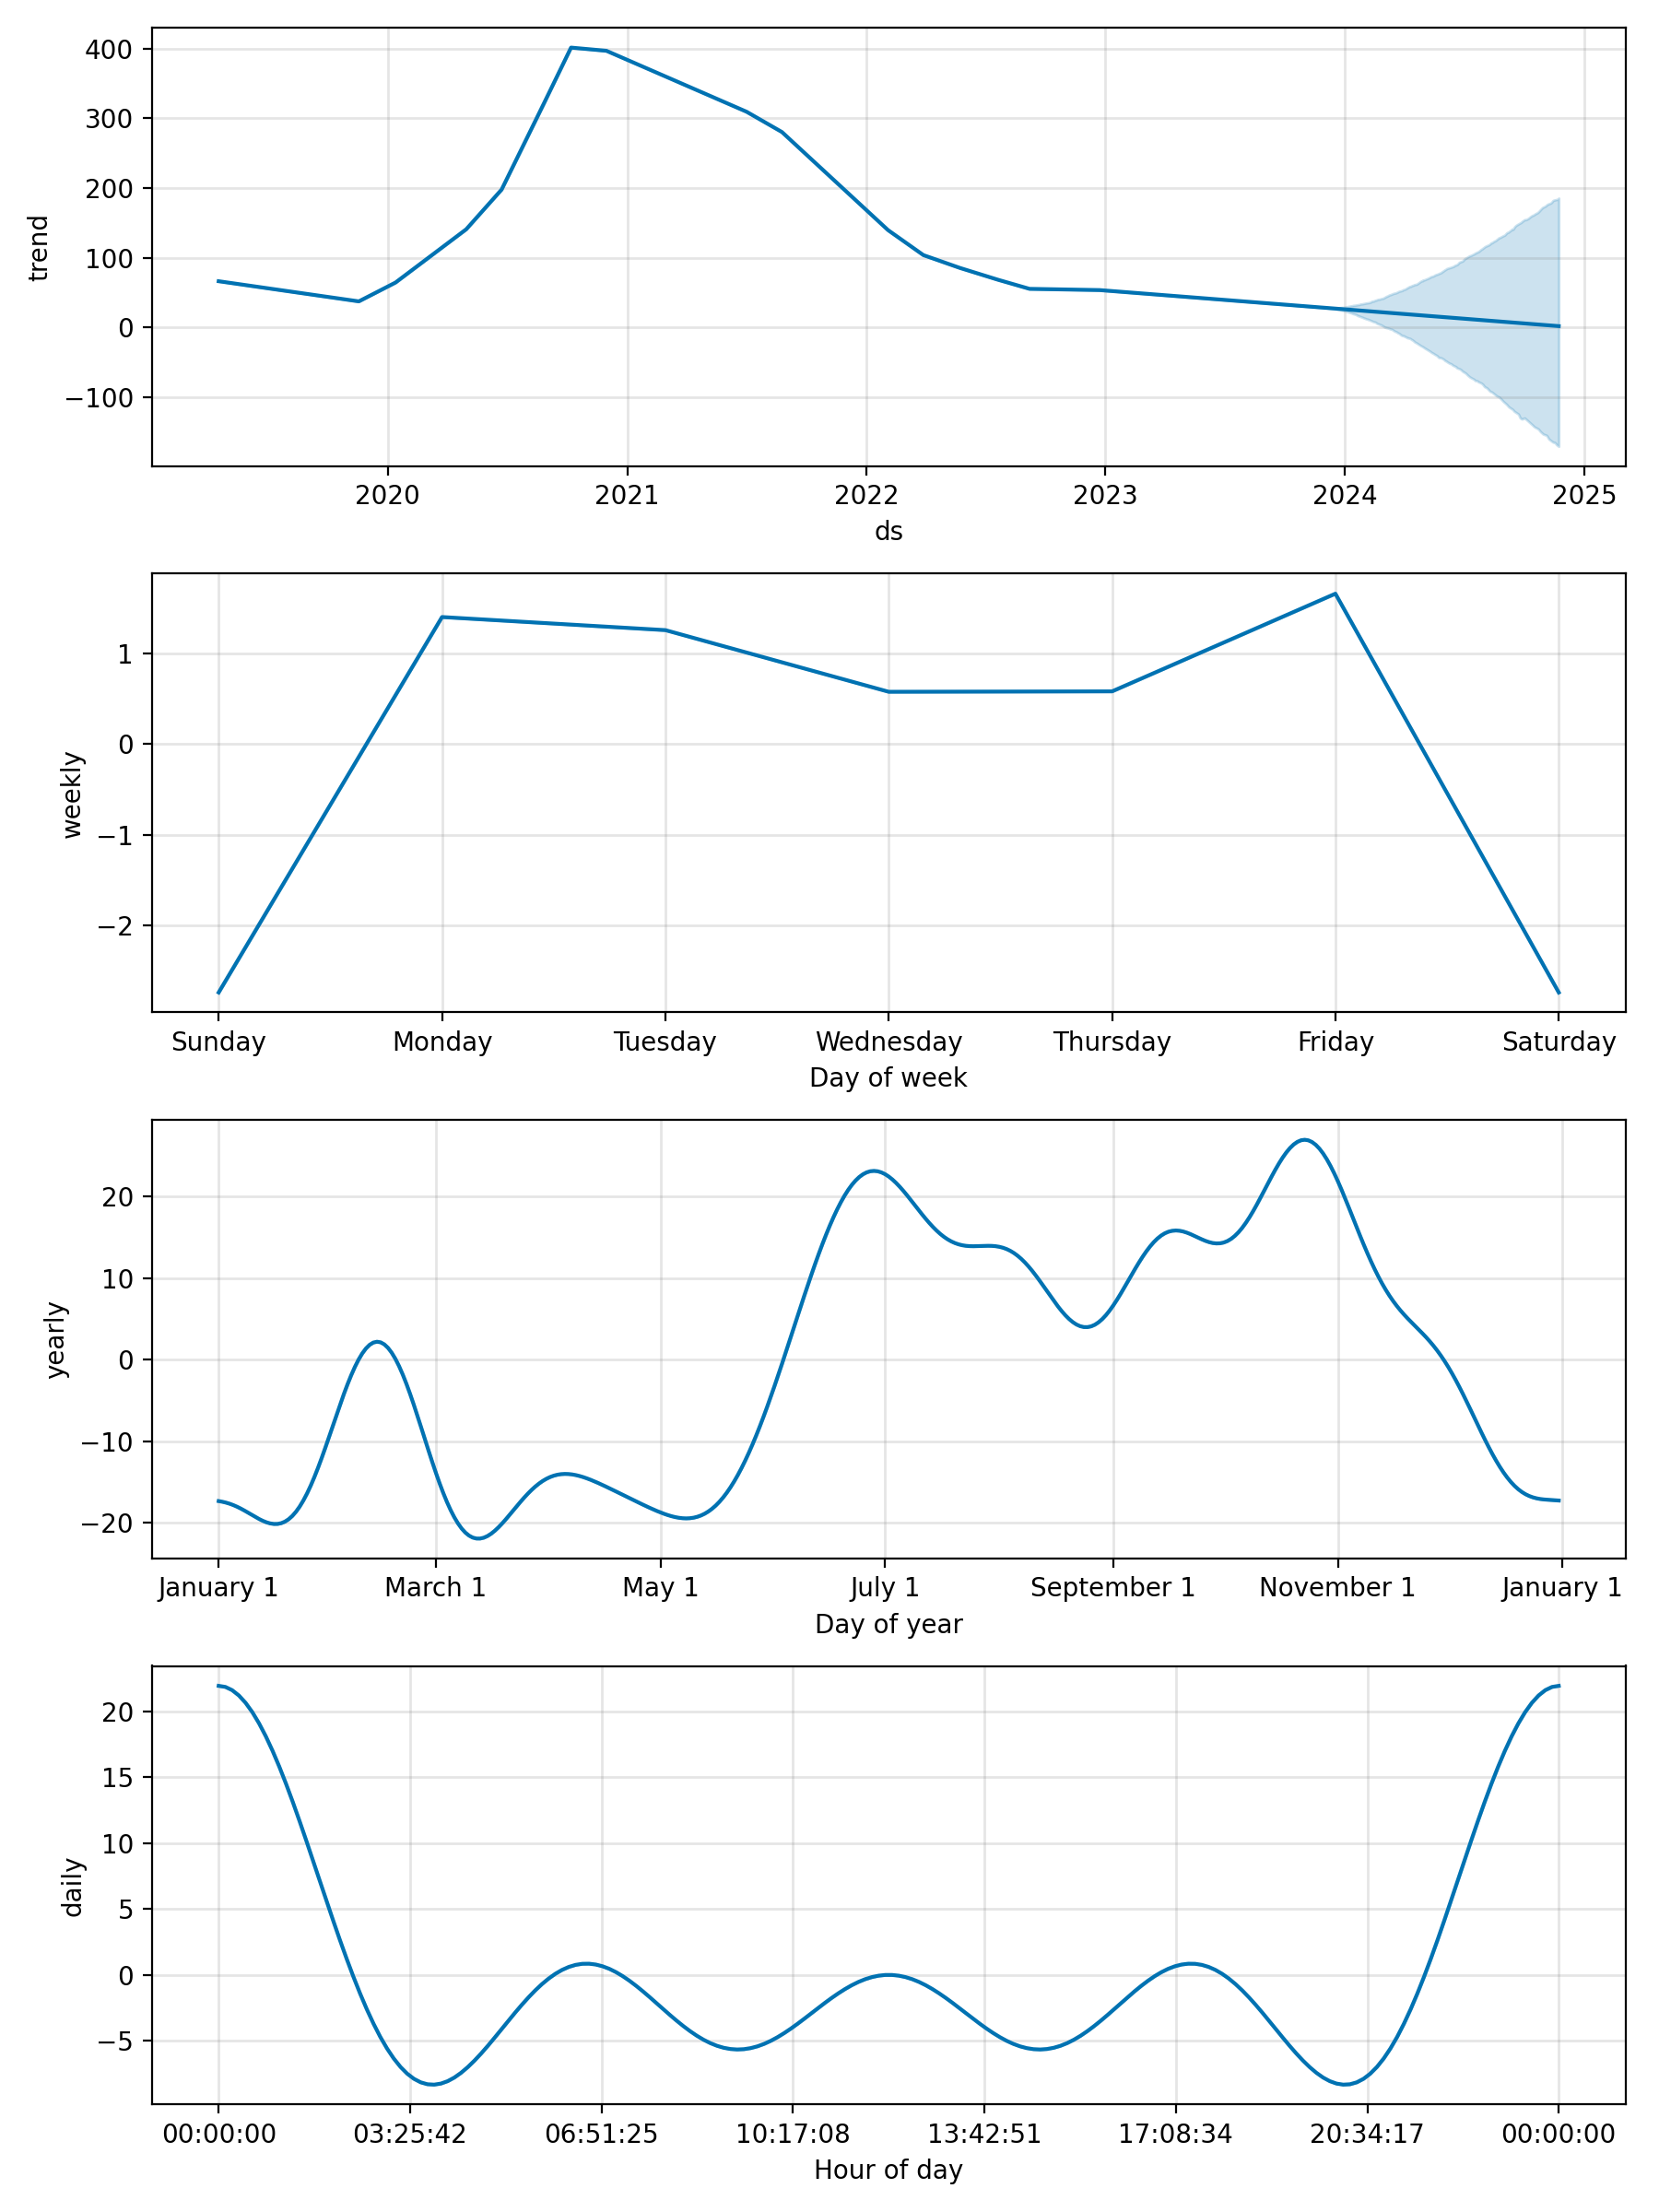

In [ ]:
#Las siguientes gráficas muestran la tendencia de la acción en diferentes periodos, en la primera es la tendendia
#que seguirá el proximo año (la cual está sombreada),las demás, muestran como se comportó el precio durante a lo
#largo del año, semanalmente y diariamente.
from prophet.plot import plot_components
plot_components(fpb,forecast)